Project: No-Show Appointments


Introduction
This dataset collects information from 100k medical appointments in Brazil and is 
focused on the question of whether or not patients show up for their appointment. A 
number of characteristics about the patient are included in each row This dataset has 14 characteristics about the patient as PatientID, AppoitmentID, 
Gender,  Scheduled Day, Appointment Day, Age, Neighbourhood, Scholarship, 
Hypertension, Diabetes, Alcoholism, Handicap, SMS_Received and No_Show.
important for us to know in order to predict if a patient will show up for their 
scheduled appointment?


Question
Question : what is the relation between Count of alcoholism and no show ?
Question : How does Receiving an SMS have an effect on the patient's show up 
?
Question : what is the relation between(gender type,the age) and the patient's 
show up ?
Question : How Scholarsip affect the patient's show up ?
last Question : what is the relation between handicap and no show ?

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_palette(sns.color_palette())

Data Wrangling
General Properties

In [3]:
# Loading data and print out a few lines. 
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head(3)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No


In [4]:
# Data Wrangling
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
# Data Wrangling
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [6]:
# Checking Handicap Column
df.SMS_received.value_counts()

0    75045
1    35482
Name: SMS_received, dtype: int64

In [7]:
#Checking the null rows
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [8]:
#Checking the duplicated columns
df.duplicated().sum()

0

Data Cleaning
Data Quality and Structure synthesis:

Dropping unimportant Data as (PatientID, AppointmentID)
Typo's in colum's name should be corrected
Converting some columns' types to the correct ones
Deleting outliers and wrong data

In [58]:
# Data Cleaning
#Dropping unimportant Data
df.drop(['PatientId','AppointmentID'], axis=1,inplace=True)

In [23]:
#Converting to date format
index = ['scheduled_day','appointment_day']
for col in index:
    df[col] = df[col].apply(lambda x:x.split('T')[0])
    df[col] = pd.to_datetime(df[col])

In [24]:
# Rewriting and correcting names
df.columns = df.columns.str.lower()
df.rename(columns = {'scheduledday':'scheduled_day','appointmentday':'appointment_day','hipertension':'hypertension','handcap':'handicap','no-show':'no_show'},inplace=True)

In [25]:
# Creating a new column that calculating total time 
df['total_time'] = (df['appointment_day']- df['scheduled_day']).dt.days


Exploratory Data Analysis

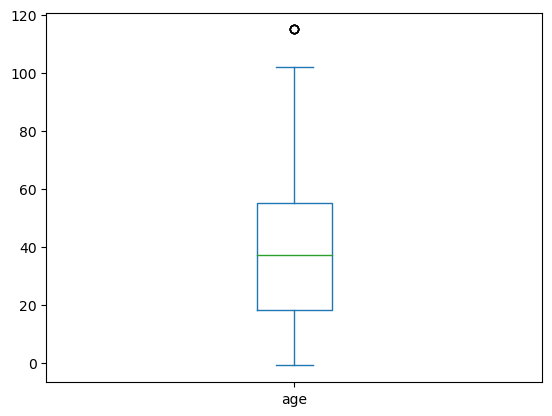

In [26]:
df.age.plot(kind='box');
outliers_rows = df.query('age < 0  | age >114')
df.drop(index =outliers_rows.index,inplace=True)

In [27]:
df.describe()

,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,total_time
count,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000
mean,37.085694,0.098271,0.197248,0.071869,0.030401,0.022213,0.321034,10.183721
std,23.104606,0.297682,0.397923,0.258272,0.171690,0.161440,0.466876,15.255082
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,15.000000
max,102.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,179.000000


In [30]:
#Deleting negative Dates
wrong_dates = df[df['total_time'] < 0]
df.drop(index=wrong_dates.index,inplace=True)

In [ ]:
#Exploratory Data Analysis



In [31]:
# function to converte categorized columns to zeros and ones
def zeros_ones(dataFrame, col):

    dataFrame[col].replace({dataFrame[col].unique()[0]:0, dataFrame[col].unique()[1]:1}, inplace=True)
#copy of df
df_corr = df.copy()

zeros_ones(df_corr, 'no_show')
zeros_ones(df_corr, 'gender')

In [32]:
df_corr.head()

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,total_time
0,0,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0,0
1,1,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0,0
2,0,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0,0
3,0,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,0
4,0,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0,0


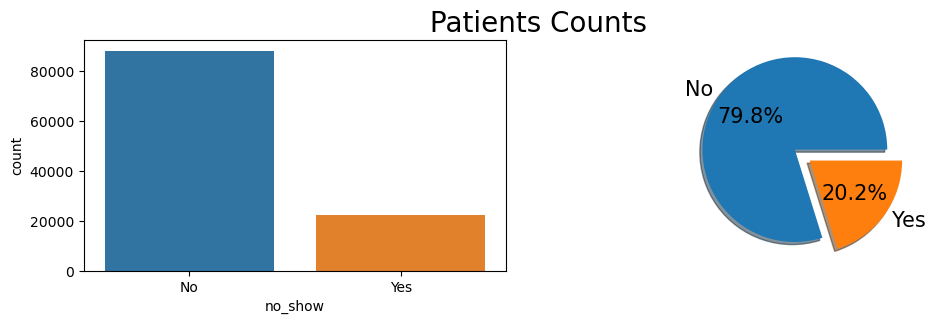

In [45]:

plt.figure(figsize=(12,3))
plt.subplot(121)
ax = sns.countplot(x=df.no_show, data=df);
plt.subplot(122)
df['no_show'].value_counts().plot.pie(autopct='%1.1f%%',fontsize=15,labels=['No','Yes'],explode=(0.1,0.1),shadow=True);
plt.axis('off');
plt.suptitle(' Patients Counts', fontsize=20);

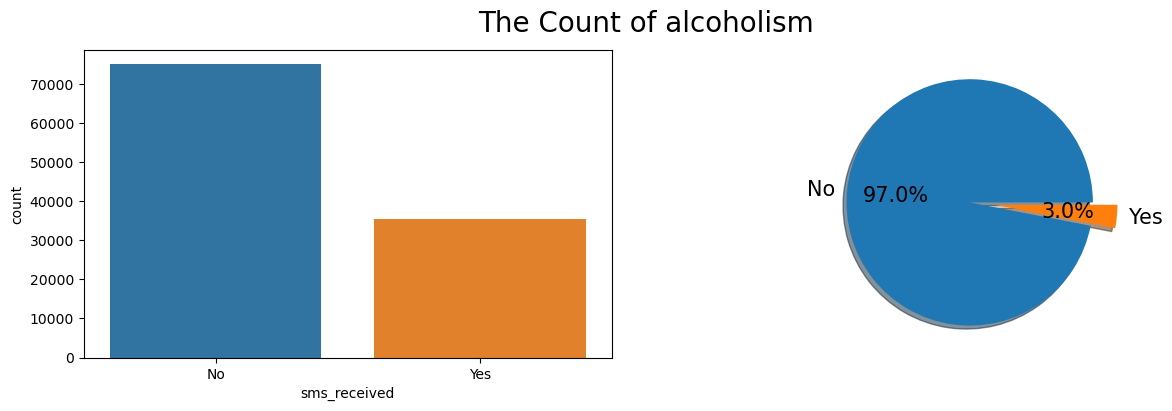

In [66]:
#plotting the recevied and not recevied SMS
plt.figure(figsize=(15,4))
plt.subplot(121)
ax = sns.countplot(x=df.sms_received, data=df)
ax.set_xticklabels(['No','Yes']);
plt.subplot(122)
df['alcoholism'].value_counts().plot(kind='pie',autopct='%1.1f%%',fontsize=15,labels=['No','Yes'],explode=(0.1,0.1),shadow=True);
plt.suptitle('The Count of alcoholism',fontsize=20)
plt.axis('off');

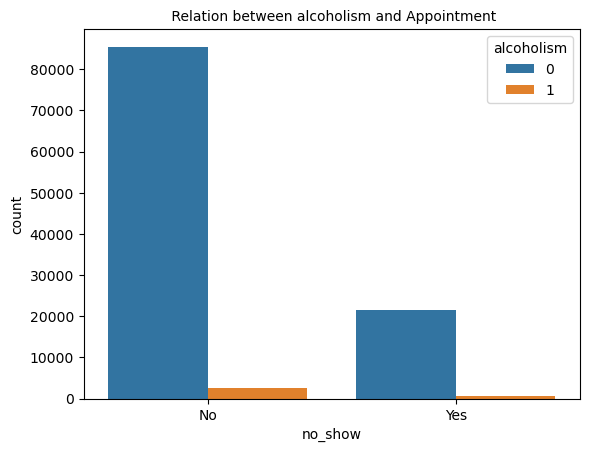

In [67]:
ax = sns.countplot(x= df['no_show'], hue=df['alcoholism'])
ax.set_title(' Relation between alcoholism and Appointment',fontsize=10);

In [ ]:
# Question 1 : How does Receiving an SMS have an effect on the patient's show up ?


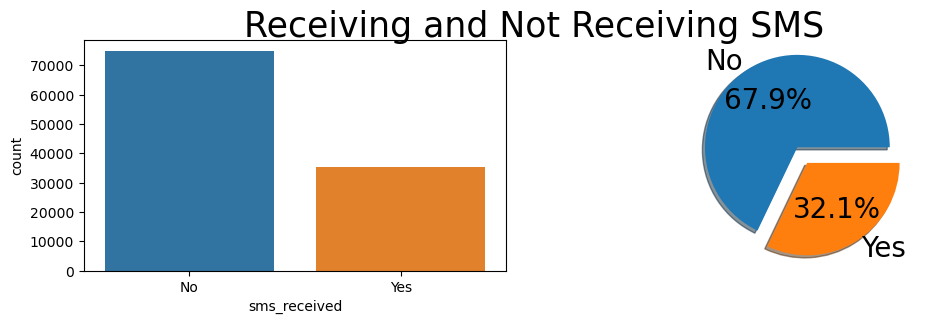

In [48]:
#plotting the recevied and not recevied SMS
plt.figure(figsize=(12,3))
plt.subplot(121)
ax = sns.countplot(x=df.sms_received, data=df)
ax.set_xticklabels(['No','Yes']);
plt.subplot(122)
df['sms_received'].value_counts().plot(kind='pie',autopct='%1.1f%%',fontsize=20,labels=['No','Yes'],explode=(0.1,0.1),shadow=True);
plt.suptitle('Receiving and Not Receiving SMS',fontsize=25)
plt.axis('off');

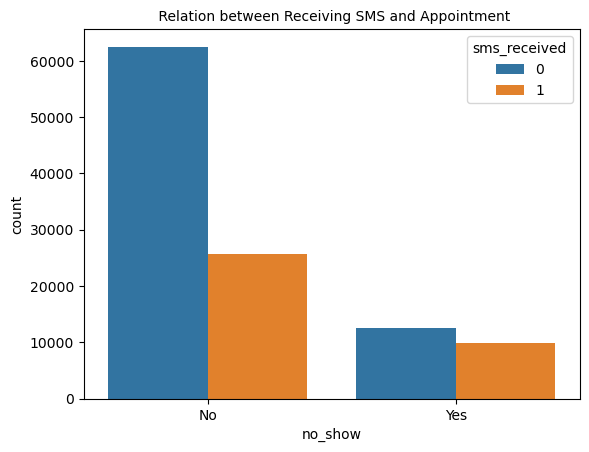

In [49]:
ax = sns.countplot(x= df['no_show'], hue=df['sms_received'])
ax.set_title(' Relation between Receiving SMS and Appointment',fontsize=10);

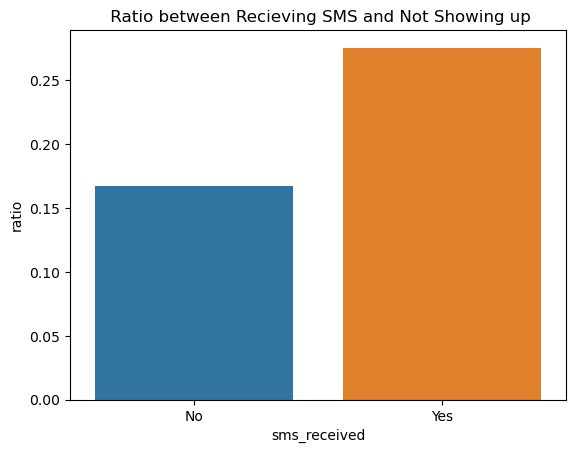

In [50]:
#  ratio between Patients who didn't show up and sms receiving.
ratio = df[df['no_show']=='Yes'].groupby('sms_received').size()/df.groupby('sms_received').size()
ax = sns.barplot(x=ratio.index, y=ratio);
ax.set_title(" Ratio between Recieving SMS and Not Showing up");
ax.set_xticklabels(['No','Yes']);
plt.ylabel('ratio');

In [ ]:
#Question 2 : what is the relation between(gender type,the age) and the patient's show up ,

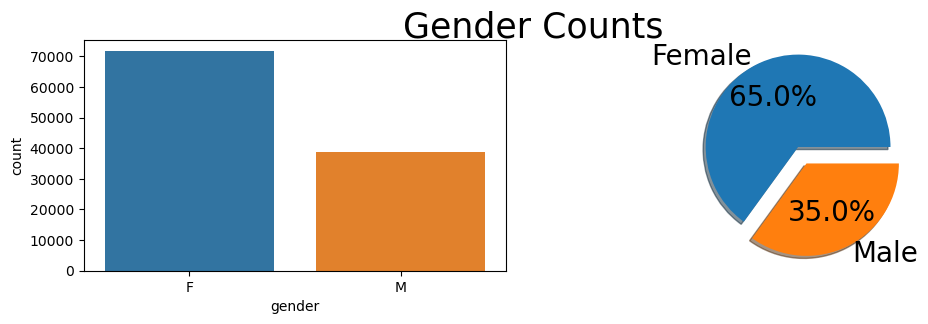

In [51]:
plt.figure(figsize=(12,3))
plt.subplot(121)
ax = sns.countplot(x=df['gender'], data = df);
plt.subplot(122)
df['gender'].value_counts().plot(kind='pie',autopct='%1.1f%%',fontsize=20,labels=['Female','Male'],explode=(0.1,0.1),shadow=True);
plt.suptitle('Gender Counts',fontsize=25)
plt.axis('off');

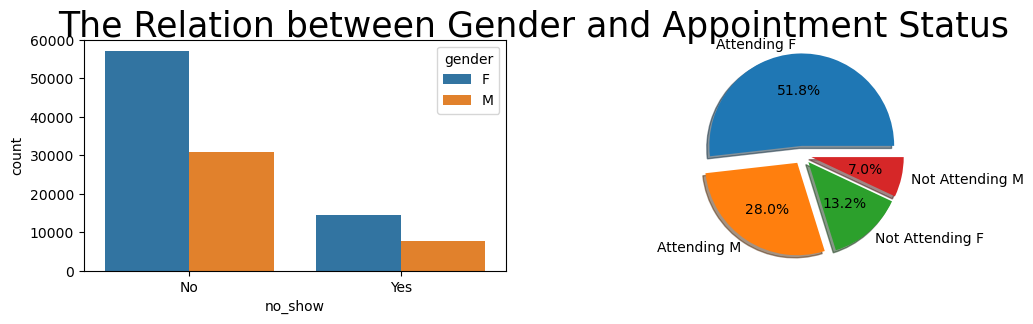

In [53]:
plt.figure(figsize=(12,3))
plt.subplot(121)

ax = sns.countplot(x=df['no_show'], hue=df['gender']);

plt.subplot(122)
df.groupby('no_show').gender.value_counts().plot.pie(shadow=True,autopct='%1.1f%%',explode=(0.1,0.1,0.1,0.1),labels=['Attending F','Attending M','Not Attending F','Not Attending M']);
plt.axis('off');
plt.suptitle('The Relation between Gender and Appointment Status',fontsize=25);

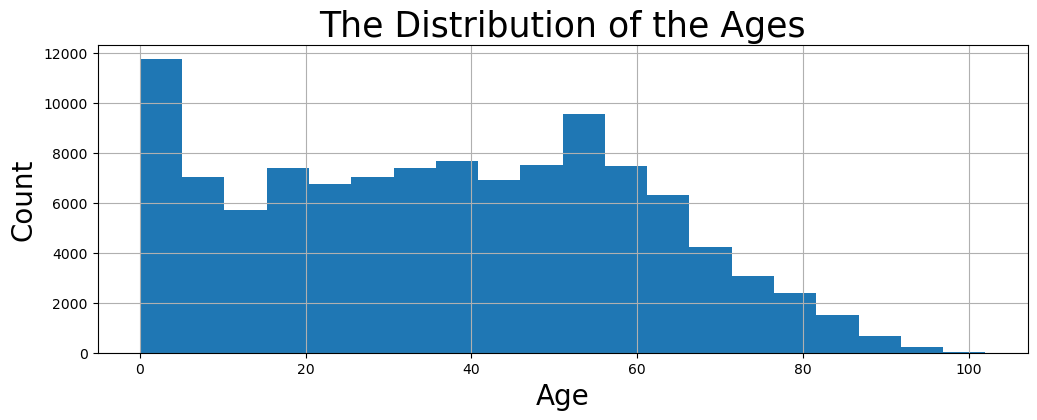

In [54]:
plt.figure(figsize=(12,4))
df.age.hist(bins=20)
plt.title('The Distribution of the Ages',fontsize=25);
plt.xlabel('Age',fontsize=20);
plt.ylabel('Count',fontsize=20);

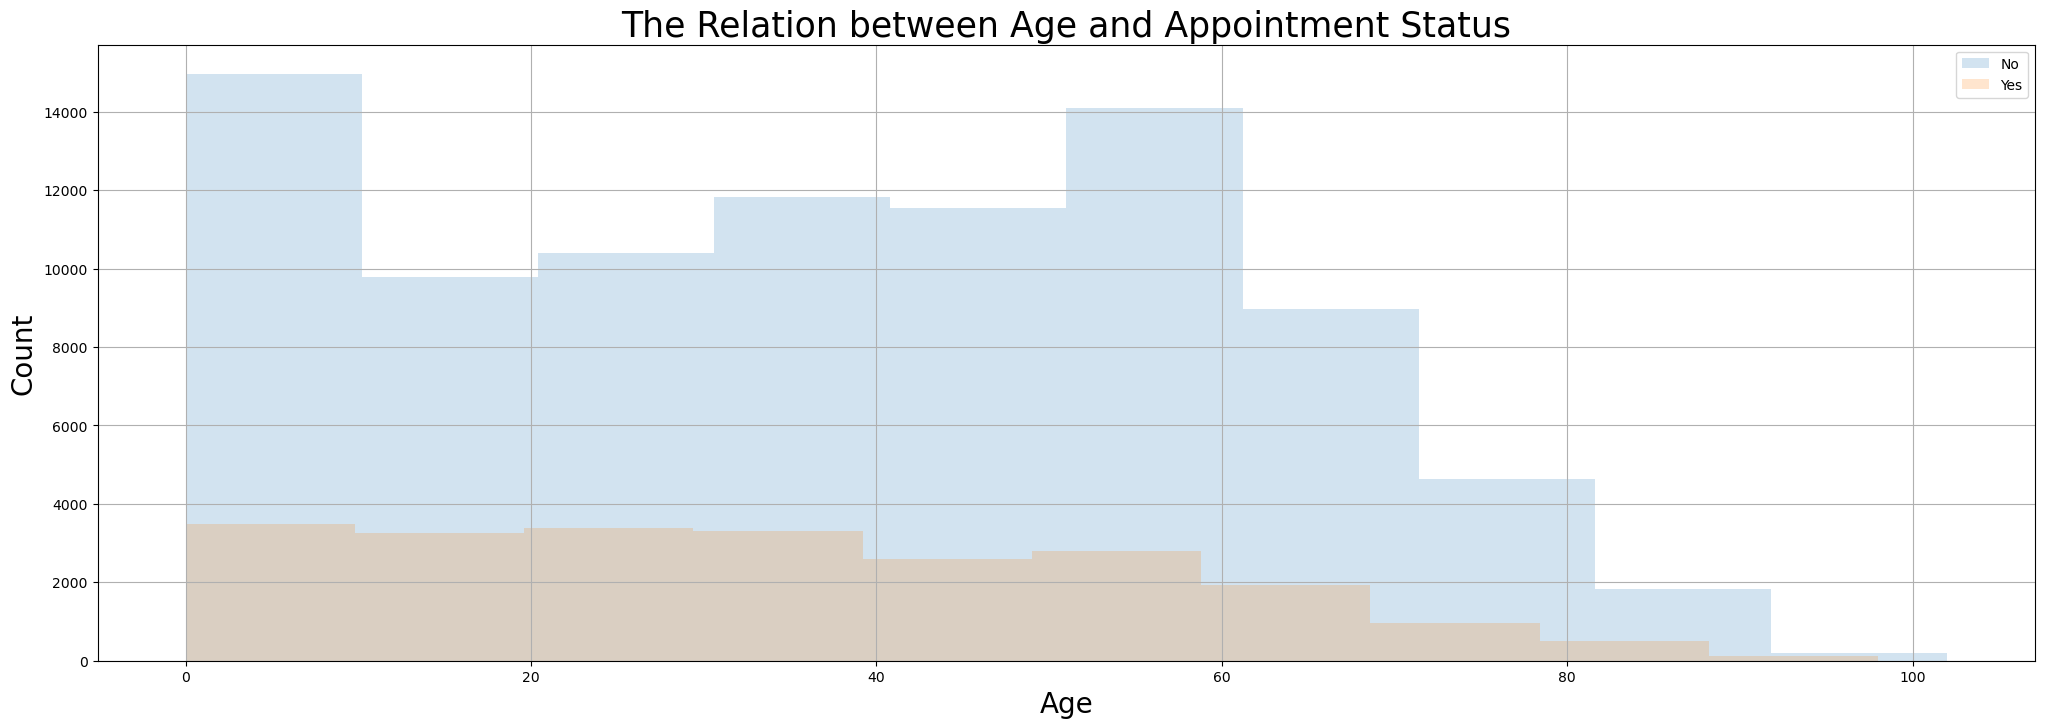

In [55]:
plt.figure(figsize=(25,8));
df.groupby('no_show').age.hist(alpha=0.2);
plt.legend(df.no_show.unique());
plt.title('The Relation between Age and Appointment Status', fontsize=25)
plt.xlabel('Age',fontsize=20);
plt.ylabel('Count',fontsize=20);

In [ ]:
#Question 3 : How Scholarsip affect the patient's show up ?

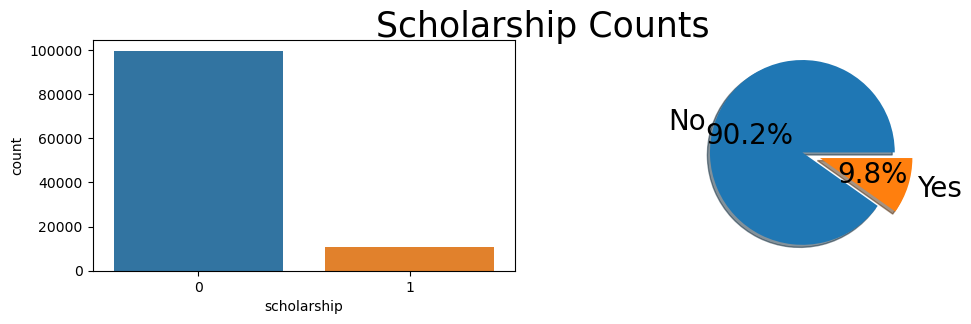

In [56]:
plt.figure(figsize=(12,3))
plt.subplot(121)
ax = sns.countplot(x=df['scholarship'], data = df);
plt.subplot(122)
df['scholarship'].value_counts().plot(kind='pie',autopct='%1.1f%%',fontsize=20,explode=(0.1,0.1),labels=['No','Yes'],shadow=True);
plt.suptitle('Scholarship Counts',fontsize=25)
plt.axis('off');

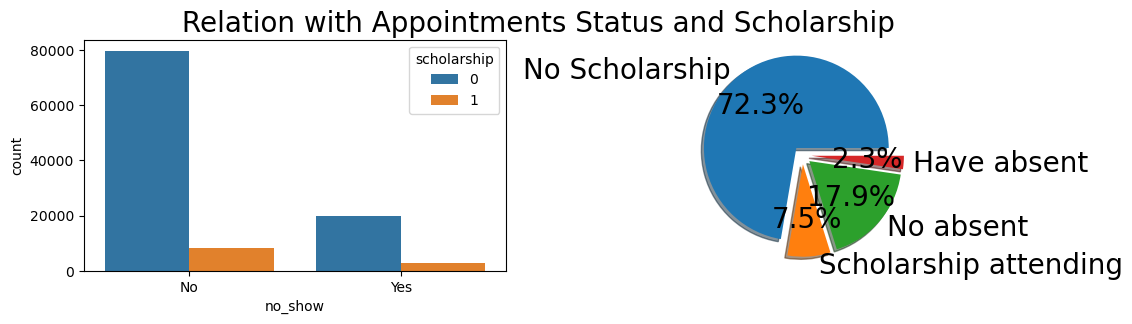

In [57]:
plt.figure(figsize=(12,3))
plt.subplot(121)
ax = sns.countplot(x=df['no_show'], hue=df['scholarship'])
plt.subplot(122)
df.groupby('no_show').scholarship.value_counts().plot(kind='pie',autopct='%1.1f%%',fontsize=20,explode=(0.1,0.1,0.1,0.1),shadow=True,labels=['No Scholarship',' Scholarship attending','No absent','Have absent']);
plt.suptitle(' Relation with Appointments Status and Scholarship',fontsize=20)
plt.axis('off');

In [ ]:
# last Question

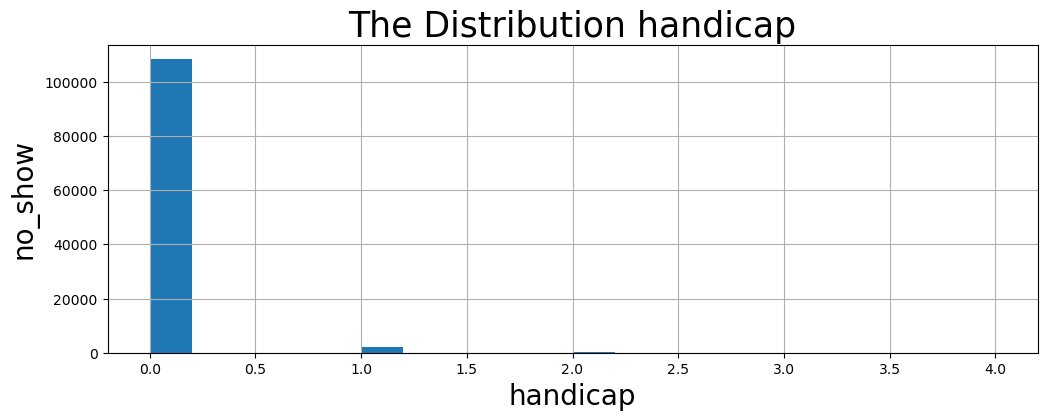

In [73]:
plt.figure(figsize=(12,4))
df.handicap.hist(bins=20)
plt.title('The Distribution handicap',fontsize=25);
plt.xlabel('handicap',fontsize=20);
plt.ylabel('no_show',fontsize=20);

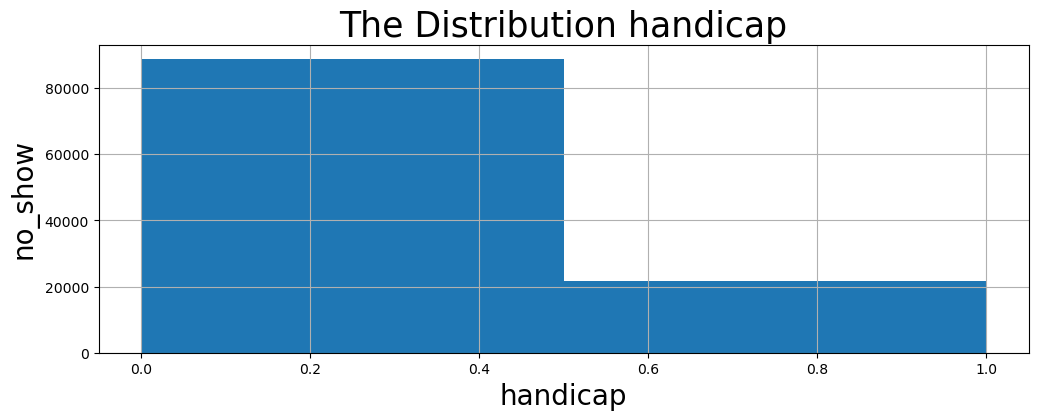

In [79]:
plt.figure(figsize=(12,4))
df.hypertension.hist(bins=2)
plt.title('The Distribution handicap',fontsize=25);
plt.xlabel('handicap',fontsize=20);
plt.ylabel('no_show',fontsize=20);

Conclusions
-Age and illnesses (such as diabetes and hypertension) have an impact on the patient's attendance. The patients with ages between (20-80) years and (0-20) and +80 years did not show up less frequently, as we discovered. This decline is due to the higher prevalence of diabetes and hypertension in people aged 20 to 80.
-The gender didn't affect the patient's showing up as the percentage of showing and no showing females is nearly the same percentage of showing and no showing males
-Receiving SMS and the amount of time between the appointment day and the day of scheduling have an impact on the patient's attendance. As we saw above, the lengthy gap between the two days and failure to get an SMS reminder cause patients to miss their appointments.
-The neighbourhood doesn't affect on the patient's show up. As we noticed nearly all neighbourhoods have the same ratio of not showing up.
-The majority of patients who were not eligible for scholarships attended appointments more frequently than those who were, but I believe the opposite is more likely to be true.


Limitations
The patients' location in relation to their healthcare facilities and their financial situation will be very helpful.
It will aid in research if there are an equal number of patients in each category of impairment.
Needing more indicators to explore why the patients who didn't have scholarship, showed up more than others.

References
https://matplotlib.org/
https://seaborn.pydata.org/
https://pandas.pydata.org/